In [1]:
%cd /home/dongmin/23FW-NCG/jeongganbo-omr
%load_ext autoreload
%autoreload 2

/home/dongmin/23FW-NCG/jeongganbo-omr


In [2]:
import glob
import cv2
import numpy as np
from data_utils import JeongganboReader
import matplotlib.pyplot as plt

from exp_utils import read_jeongganbo, make_jeonggan_list, get_label, JeongganProcessor, COLOR_DICT

# Load ext files and paths

**Daegeum**
* YeoMinRock score (p17~36)
* pitch names
* notations

In [3]:
jng_img_dir = 'test/split_pngs'
jng_img_paths = sorted(glob.glob(f'{jng_img_dir}/*.png'))
print('num jng imgs: ', len(jng_img_paths))

pattern_path_base = 'test/daegeum/'
# pattern_path_sub = ['notations/', 'pitches/']
pattern_path_sub = ['pitches/']
pattern_ext = '.png'

pattern_paths = { 
  subpath[:-1]: {
    path.replace(f'{pattern_path_base}{subpath}', '').replace(pattern_ext, ''): path \
    for path in sorted(glob.glob(f'{pattern_path_base}{subpath}*{pattern_ext}'))
  } for subpath in pattern_path_sub 
}

# print([ name for name in pattern_paths['notations'].keys() ])
print('ptrn key list: ', [ name for name in pattern_paths['pitches'].keys() ])

num jng imgs:  141738
ptrn key list:  ['go', 'go_d', 'hwang', 'hwang_dd', 'hwang_ot', 'hwang_u', 'hwang_uu', 'hwnag_d', 'hyeop', 'hyeop_u', 'joong', 'joong_d', 'joong_dd', 'joong_u', 'lim', 'lim_d', 'lim_dd', 'lim_u', 'mu', 'mu_d', 'mu_u', 'nam', 'nam_d', 'nam_dd', 'nam_u', 'tae', 'tae_d', 'tae_dd', 'tae_u']


# **CONSTANTS**

In [4]:
THRESHOLD = 0.48
MATCH_MODE = cv2.TM_CCOEFF_NORMED
PTRN_SIZE = 48

PTRN_TEST_ORDER = [ 'go_d', 'go', 'hwang_dd', 'hwnag_d', 'hwang_uu', 'hwang_u', 'hwang_ot', 'hwang', 'hyeop_u', 'hyeop', 'joong_dd', 'joong_d', 'joong_u', 'joong', 'lim_dd', 'lim_d', 'lim_u', 'lim', 'mu_d', 'mu_u', 'mu', 'nam_dd', 'nam_d', 'nam_u', 'nam', 'tae_dd', 'tae_d', 'tae_u', 'tae' ]

PTRN_IMG_DICT = { name: cv2.imread(pattern_paths['pitches'][name]) for name in PTRN_TEST_ORDER }

jng_processor = JeongganProcessor(PTRN_SIZE, THRESHOLD, MATCH_MODE)

## div 2 jng test
**jng imgs are not on github**

total num rows:  3
0 None
1 None
2 {'col_div': 2, 'cols': [(14, 52, 52, 85, 'tae_u'), (59, 50, 91, 88, 'nam')]}
tae_u:7 nam:9 


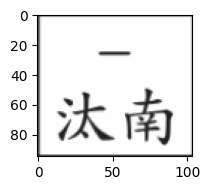

total num rows:  3
0 {'col_div': 1, 'cols': [(35, 4, 72, 43, 'nam')]}
1 None
2 {'col_div': 1, 'cols': [(33, 50, 79, 88, 'lim')]}
nam:2 lim:8 


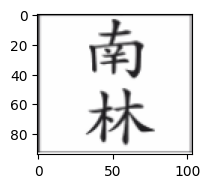

total num rows:  3
0 {'col_div': 1, 'cols': [(31, 8, 76, 45, 'lim_u')]}
1 None
2 {'col_div': 1, 'cols': [(32, 49, 73, 87, 'nam_d')]}
lim_u:2 nam_d:8 


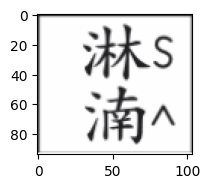

total num rows:  3
0 {'col_div': 1, 'cols': [(32, 6, 72, 45, 'nam_d')]}
1 None
2 {'col_div': 2, 'cols': [None, (58, 51, 97, 86, 'lim_u')]}
nam_d:2 lim_u:9 


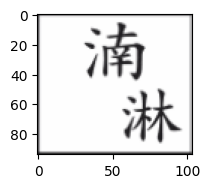

In [33]:
def get_new_size(path):
  img = cv2.imread(path)
  
  img_h, img_w = img.shape[:2]
  
  target_w = 104
  ratio = target_w / img_w
  
  target_h = round(img_h * ratio)
  
  return cv2.resize(img, (target_w, target_h))

anormal_jng_img_paths = glob.glob('test/anormal_jngs/*.png')
anormal_jng_imgs = [ get_new_size(path) for path in anormal_jng_img_paths ]

for iter_idx, jng_img in enumerate(anormal_jng_imgs):
  jng_aligned_result = jng_processor(jng_img, PTRN_IMG_DICT)

  print('total num rows: ', jng_aligned_result['row_div'])
  
  for row_idx, row in enumerate(jng_aligned_result['rows']):
    print(row_idx, row)
  
  print(get_label(jng_aligned_result))
  
  plt.figure(figsize=(2, 2))
  plt.imshow(jng_img)
  plt.show()

# result encoding with positional indices

**div 1 & div 3**

1 | 2 | 3

4 | 5 | 6

7 | 8 | 9


**div 2 : 1**

10

11

**div 2 : 2**

12 | 13

14 | 15

total num rows:  3
0 {'col_div': 1, 'cols': [(30, 7, 73, 43, 'lim_u')]}
1 None
2 {'col_div': 1, 'cols': [(31, 48, 70, 85, 'nam_d')]}

lim_u:2 nam_d:8 


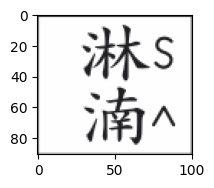

total num rows:  1
0 None




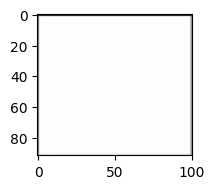

total num rows:  1
0 None




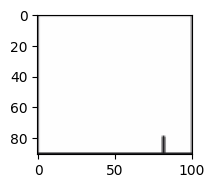

total num rows:  1
0 None




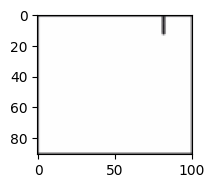

total num rows:  3
0 None
1 None
2 {'col_div': 1, 'cols': [(30, 50, 73, 86, 'lim_u')]}

lim_u:8 


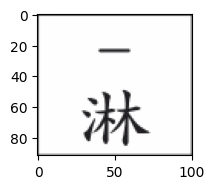

total num rows:  1
0 {'col_div': 1, 'cols': [(31, 26, 73, 62, 'go_d')]}

go_d:5


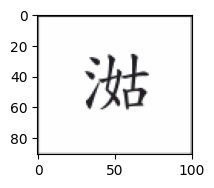

total num rows:  1
0 {'col_div': 1, 'cols': [(31, 25, 73, 61, 'tae_u')]}

tae_u:5


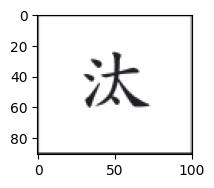

total num rows:  1
0 None




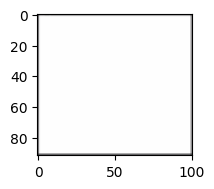

total num rows:  1
0 None




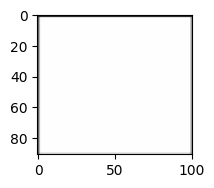

total num rows:  3
0 {'col_div': 1, 'cols': [(31, 8, 72, 41, 'mu_u')]}
1 None
2 {'col_div': 1, 'cols': [(31, 51, 74, 84, 'tae_u')]}

mu_u:2 tae_u:8 


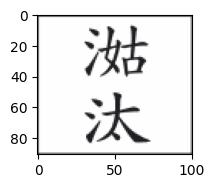

total num rows:  3
0 {'col_div': 1, 'cols': [(29, 6, 72, 43, 'hwang_dd')]}
1 None
2 {'col_div': 1, 'cols': [(33, 48, 69, 86, 'nam')]}

hwang_dd:2 nam:8 


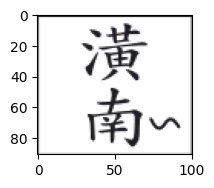

total num rows:  1
0 None




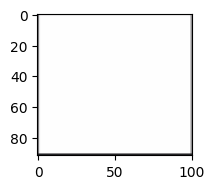

total num rows:  1
0 None




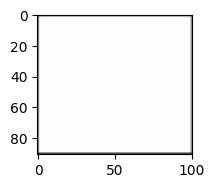

total num rows:  3
0 {'col_div': 1, 'cols': [(30, 7, 73, 43, 'lim_u')]}
1 None
2 {'col_div': 1, 'cols': [(31, 48, 70, 85, 'nam_d')]}

lim_u:2 nam_d:8 


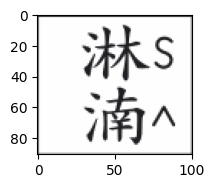

total num rows:  1
0 None




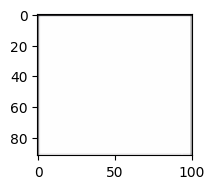

total num rows:  1
0 None




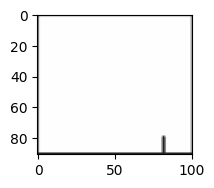

total num rows:  1
0 None




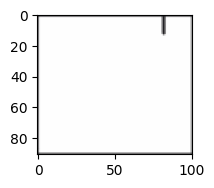

total num rows:  3
0 None
1 None
2 {'col_div': 1, 'cols': [(30, 50, 73, 86, 'lim_d')]}

lim_d:8 


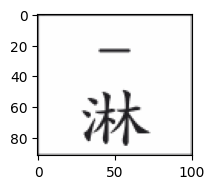

total num rows:  1
0 {'col_div': 1, 'cols': [(32, 26, 73, 62, 'go_d')]}

go_d:5


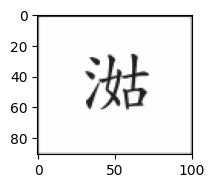

total num rows:  1
0 {'col_div': 1, 'cols': [(30, 23, 72, 64, 'hwang_u')]}

hwang_u:5


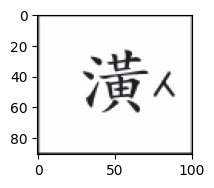

total num rows:  1
0 {'col_div': 1, 'cols': [(31, 25, 73, 61, 'tae_u')]}

tae_u:5


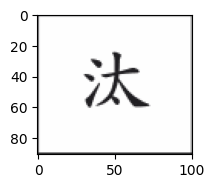

total num rows:  1
0 None




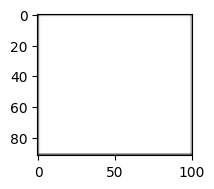

total num rows:  3
0 {'col_div': 1, 'cols': [(32, 8, 73, 40, 'go_d')]}
1 None
2 {'col_div': 2, 'cols': [None, (53, 51, 92, 86, 'lim_u')]}

go_d:2 lim_u:9 


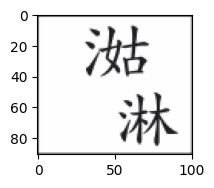

total num rows:  3
0 {'col_div': 1, 'cols': [(32, 9, 73, 41, 'go_d')]}
1 None
2 {'col_div': 1, 'cols': [(32, 50, 74, 83, 'tae_u')]}

go_d:2 tae_u:8 


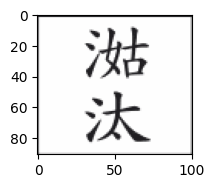

total num rows:  3
0 {'col_div': 1, 'cols': [(29, 6, 72, 43, 'hwang_u')]}
1 None
2 {'col_div': 1, 'cols': [(33, 50, 69, 88, 'nam')]}

hwang_u:2 nam:8 


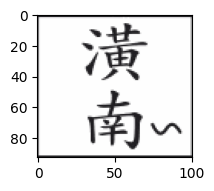

total num rows:  1
0 None




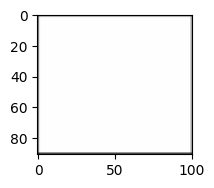

total num rows:  1
0 {'col_div': 1, 'cols': [(31, 25, 73, 61, 'go_d')]}

go_d:5


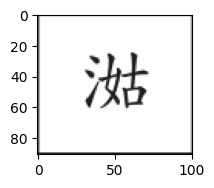

total num rows:  1
0 None




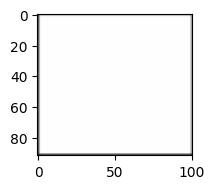

total num rows:  1
0 None




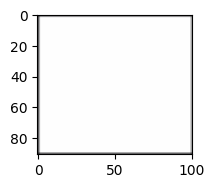

total num rows:  1
0 {'col_div': 1, 'cols': [(33, 21, 69, 63, 'nam_u')]}

nam_u:5


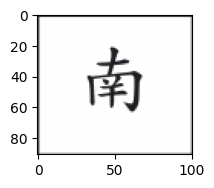

In [5]:
start = 1200
end = start + 30

for iter_idx, jng_img_path in enumerate(jng_img_paths[start:end]):
  filename = jng_img_path.split('/')[-1]
  title, inst_name, jng_idx = filename.split('_')
  jng_idx = jng_idx.replace('.png', '')
  
  jng_img = cv2.imread(jng_img_path)
  jng_aligned_result = jng_processor(jng_img, PTRN_IMG_DICT)

  print('total num rows: ', jng_aligned_result['row_div'])
  
  for row_idx, row in enumerate(jng_aligned_result['rows']):
    print(row_idx, row)
  
  print()
  print(get_label(jng_aligned_result))
  
  plt.figure(figsize=(2, 2))
  plt.imshow(jng_img)
  plt.show()

## write jng info and label as .csv file

In [14]:
import csv
import time
from tqdm import tqdm

with open(f'test/labels_{int(time.time())}.csv', 'w', newline='', encoding='utf-8') as f:
  writer = csv.writer(f)
  writer.writerow(['filename', 'title', 'inst_name', 'jng_idx', 'label'])
    
  for jng_img_path in tqdm(jng_img_paths, leave=False):
    filename = jng_img_path.split('/')[-1]
    title, inst_name, jng_idx = filename.split('_')
    jng_idx = jng_idx.replace('.png', '')
    
    jng_img = cv2.imread(jng_img_path)
    jng_aligned_result = jng_processor(jng_img, PTRN_IMG_DICT)
    
    label = get_label(jng_aligned_result)
    writer.writerow([filename, title, inst_name, jng_idx, label])

  0%|          | 0/141738 [00:00<?, ?it/s]